In [1]:
import pandas as pd
ipo_df = pd.read_csv("C:/Users/davir/Desktop/ipos_1521.csv")
precoipo = pd.read_csv("C:/Users/davir/Desktop/preco_ipo.csv")

In [2]:
ipo_df

,date,codneg,preult,voltot
0,2015-03-10,PSVM11,3.39,339.0
1,2015-03-11,PSVM11,3.38,1014.0
2,2015-03-13,PSVM11,3.39,1017.0
3,2015-03-31,PSVM11,2.00,6054400.0
4,2015-04-01,PSVM11,2.00,5200.0
...,...,...,...,...
20573,2021-05-05,SOMA3,11.99,45008159.0
20574,2021-05-05,TFCO4,12.60,515207.0
20575,2021-05-05,VIVA3,25.10,22077533.0
20576,2021-05-05,WIZS3,11.29,31554619.0


In [3]:
tickers = ["PSVM11" , "WIZS3" ,  "AALR3" , "MOVI3" , "PARD3", "AZUL4", "CRFB3", "IRBR3", "OMGE3", "CAML3", 
                  "BKBR3", "BRDT3", "GNDI3", "HAPV3", "BIDI4", "SBFG3","NEOE3", "VIVA3", "BMGB4", "CEAB3", 
                  "MTRE3", "LWSA3", "MDNE3", "PRNR3", "ALPK3", "AMBP3", "SOMA3", "DMVF3", "LJQQ3", "LAVV3", 
                  "PGMN3", "PETZ3", "PLPL3", "MELK3", "HBSA3", "CURY3", "BOAS3", "SEQL3", "GMAT3", "TFCO4", 
                  "CASH3", "ENJU3", "AERI3", "RRRP3", "AVLL3", "RDOR3", "NGRD3"]
abertura = list(precoipo['preco'])
dict_tickers = dict(zip(tickers, abertura))

In [4]:
date_list = []
for ticker in tickers:
    df = ipo_df[ipo_df.codneg==ticker]
    date_list.append(df["date"].iloc[0])
    
date_ipo_df = pd.DataFrame(list(zip(tickers, date_list)), columns=["tickers", "date"])
date_ipo_df["date"] = pd.to_datetime(date_ipo_df["date"], format='%Y-%m-%d')
date_ipo_df

,tickers,date
0,PSVM11,2015-03-10
1,WIZS3,2015-06-05
2,AALR3,2016-10-28
3,MOVI3,2017-02-08
4,PARD3,2017-02-14
5,AZUL4,2017-04-11
6,CRFB3,2017-07-20
7,IRBR3,2017-07-31
8,OMGE3,2017-07-31
9,CAML3,2017-09-28


In [5]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [6]:
ipos_2015 = date_ipo_df[(date_ipo_df['date'] >= '2015-01-01') & (date_ipo_df['date'] <= '2015-12-31')]
ipos_2016 = date_ipo_df[(date_ipo_df['date'] >= '2016-01-01') & (date_ipo_df['date'] <= '2016-12-31')]
ipos_2017 = date_ipo_df[(date_ipo_df['date'] >= '2017-01-01') & (date_ipo_df['date'] <= '2017-12-31')]
ipos_2018 = date_ipo_df[(date_ipo_df['date'] >= '2018-01-01') & (date_ipo_df['date'] <= '2018-12-31')]
ipos_2019 = date_ipo_df[(date_ipo_df['date'] >= '2019-01-01') & (date_ipo_df['date'] <= '2019-12-31')]
ipos_2020 = date_ipo_df[(date_ipo_df['date'] >= '2020-01-01') & (date_ipo_df['date'] <= '2020-12-31')]

## 2015

In [7]:
rent_df_15 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_15 = ipos_2015["tickers"]
for t in tickers_15:
    rent_df_15.loc[t] = [rentability(t, c) for c in time]
rent_df_15['year'] = 2015
rent_df_15.describe()

,1D,15D,1M,today,year
count,2.000000,2.000000,2.000000,2.000000,2.0
mean,32.717937,17.763749,21.245150,89.427018,2015.0
std,28.262727,0.914476,10.087908,135.988750,0.0
min,12.733171,17.117117,14.111922,-6.731549,2015.0
25%,22.725554,17.440433,17.678536,41.347735,2015.0
50%,32.717937,17.763749,21.245150,89.427018,2015.0
75%,42.710320,18.087065,24.811764,137.506302,2015.0
max,52.702703,18.410381,28.378378,185.585586,2015.0


<AxesSubplot:>

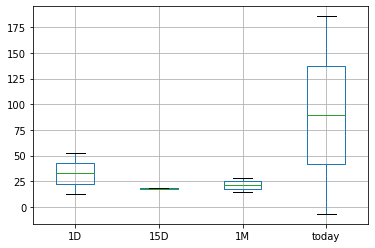

In [8]:
rent_df_15.boxplot(column=['1D', '15D', '1M', 'today'])

## 2016

In [9]:
rent_df_16 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_16 = ipos_2016["tickers"]
for t in tickers_16:
    rent_df_16.loc[t] = [rentability(t, c) for c in time]
rent_df_16['year'] = 2016
rent_df_16.describe()

,1D,15D,1M,today,year
count,1.0,1.00,1.0,1.0,1.0
mean,-4.0,-23.75,-20.0,-54.8,2016.0
std,NaN,NaN,NaN,NaN,NaN
min,-4.0,-23.75,-20.0,-54.8,2016.0
25%,-4.0,-23.75,-20.0,-54.8,2016.0
50%,-4.0,-23.75,-20.0,-54.8,2016.0
75%,-4.0,-23.75,-20.0,-54.8,2016.0
max,-4.0,-23.75,-20.0,-54.8,2016.0


<AxesSubplot:>

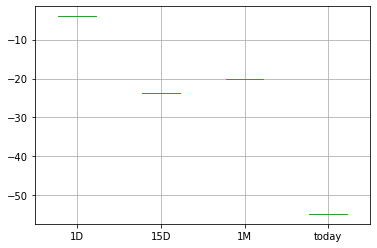

In [10]:
rent_df_16.boxplot(column=['1D', '15D', '1M', 'today'])

## 2017

In [11]:
rent_df_17 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_17 = ipos_2017["tickers"]
for t in tickers_17:
    rent_df_17.loc[t] = [rentability(t, c) for c in time]
rent_df_17['year'] = 2017
rent_df_17.describe()

,1D,15D,1M,today,year
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,3.354082,4.711792,6.391514,35.270608,2017.0
std,4.595710,6.849881,8.824979,72.443367,0.0
min,-2.666667,-5.000000,-5.555556,-78.010279,2017.0
25%,-0.666667,-0.555556,0.533333,-2.315789,2017.0
50%,5.769231,4.258443,5.315789,40.866667,2017.0
75%,6.666667,8.910256,11.538462,78.333333,2017.0
max,8.947368,14.866667,20.238095,142.628205,2017.0


<AxesSubplot:>

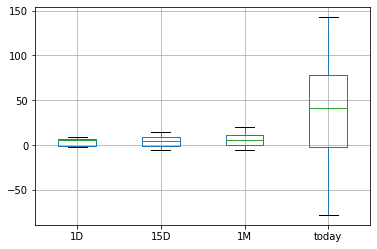

In [12]:
rent_df_17.boxplot(column=['1D', '15D', '1M', 'today'])

## 2018

In [13]:
rent_df_18 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_18 = ipos_2018["tickers"]
for t in tickers_18:
    rent_df_18.loc[t] = [rentability(t, c) for c in time]
rent_df_18['year'] = 2018
rent_df_18.describe()

,1D,15D,1M,today,year
count,3.000000,3.000000,3.000000,3.000000,3.0
mean,14.984230,12.557339,15.639884,217.565569,2018.0
std,13.444859,12.147631,30.967431,227.083991,0.0
min,-0.540541,-0.432432,-19.459459,-36.680851,2018.0
25%,11.093366,7.017826,3.906634,126.227142,2018.0
50%,22.727273,14.468085,27.272727,289.135135,2018.0
75%,22.746615,19.052224,33.189555,344.688780,2018.0
max,22.765957,23.636364,39.106383,400.242424,2018.0


<AxesSubplot:>

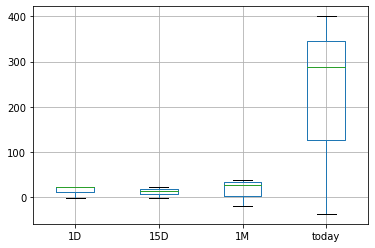

In [14]:
rent_df_18.boxplot(column=['1D', '15D', '1M', 'today'])

## 2019

In [15]:
rent_df_19 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_19 = ipos_2019["tickers"]
for t in tickers_19:
    rent_df_19.loc[t] = [rentability(t, c) for c in time]
rent_df_19['year'] = 2019
rent_df_19.describe()

,1D,15D,1M,today,year
count,5.000000,5.000000,5.000000,5.000000,5.0
mean,-3.453271,-1.695585,-2.110681,7.649152,2019.0
std,13.997895,12.635760,10.706540,65.757953,0.0
min,-27.586207,-19.396552,-15.603448,-60.000000,2019.0
25%,-1.600000,-6.880000,-7.520000,-26.060606,2019.0
50%,0.458333,-2.000000,-0.848485,1.853035,2019.0
75%,3.090909,6.060606,0.000000,7.333333,2019.0
max,8.370607,13.738019,13.418530,115.120000,2019.0


<AxesSubplot:>

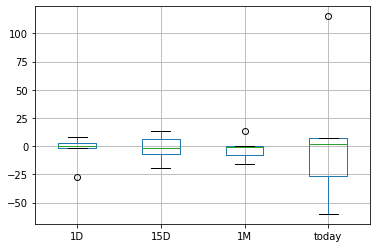

In [16]:
rent_df_19.boxplot(column=['1D', '15D', '1M', 'today'])

## 2020

In [17]:
rent_df_20 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_20 = ipos_2020["tickers"]
for t in tickers_20:
    rent_df_20.loc[t] = [rentability(t, c) for c in time]
rent_df_20['year'] = 2020
rent_df_20.describe()

,1D,15D,1M,today,year
count,27.000000,27.000000,27.000000,27.000000,27.0
mean,4.899335,6.625880,6.053839,24.666606,2020.0
std,11.071188,20.330873,34.456192,66.033198,0.0
min,-9.047619,-27.764706,-42.736842,-52.421053,2020.0
25%,-1.808279,-9.566014,-10.695767,-11.094307,2020.0
50%,0.000000,6.719368,3.490909,13.131313,2020.0
75%,13.289038,16.782580,12.768865,51.083004,2020.0
max,34.000000,57.777778,153.555556,285.000000,2020.0


<AxesSubplot:>

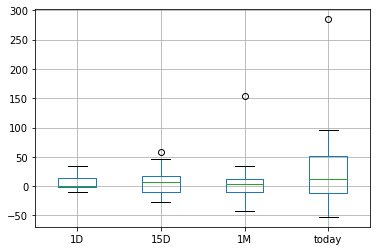

In [18]:
rent_df_20.boxplot(column=['1D', '15D', '1M', 'today'])

## 2015 à 2020

In [19]:
rent_df = pd.DataFrame(columns=["1D", "15D","1M", "3M", "5M", "today"])
time = [1, 10, 20, 60, 90, -1]
for t in tickers:
    rent_df.loc[t] = [rentability(t, c) for c in time]
rent_df.describe()

,1D,15D,1M,3M,5M,today
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,5.353000,5.580350,5.953911,16.030965,16.667813,38.264475
std,12.847432,17.233128,27.865802,48.551964,44.654702,94.911895
min,-27.586207,-27.764706,-42.736842,-69.473684,-62.315789,-78.010279
25%,-1.688805,-5.735294,-8.093333,-12.095238,-13.566138,-16.680387
50%,0.458333,5.526316,3.490909,8.678021,10.170213,10.444444
75%,10.180755,15.492157,13.765226,31.072727,38.970607,57.921922
max,52.702703,57.777778,153.555556,224.500000,146.935484,400.242424


<AxesSubplot:>

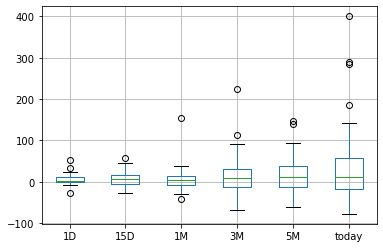

In [20]:
rent_df.boxplot(column=['1D', '15D', '1M', '3M', '5M', 'today'])